# Chapter 6 : Stability
---

In [1]:
import sys

if (path := "C:/Users/Tom/pycharm-projects/python-control") not in sys.path:
    sys.path.append(path)

from python_control import s, TransferFunction, K
from python_control import routh_hurwitz

## 6.2 : Routh-Hurwitz Criterion

### Example 6.1 : Creating a Routh Table

Make the Routh table for the system:

![feedback system for example 6.1](./images/example_6-1.png)

In [2]:
G = TransferFunction(1000 / ((s + 2) * (s + 3) * (s + 5)))
H = TransferFunction(1)
T = G.feedback(H)
T.expr

1000.0/(1.0*s**3 + 10.0*s**2 + 31.0*s + 1030.0)

In [3]:
print(routh_hurwitz(T.denominator_poly))

    s^3      1     31
    s^2     10   1030
    s^1    -72      0
    s^0   1030      0



Simply stated, the Routh-Hurwitz criterion declares that the number of roots of the polynomial that are in the right half-plane is equal to the number of *sign changes* in the first column. A system is stable if there are no sign changes in the first column of the Routh table. Thus, the system is unstable since two poles exist in the right half-plane.

In [4]:
T.poles

[(-13.413558888341958+0j),
 (1.706779444170985+8.595049569173732j),
 (1.706779444170985-8.595049569173732j)]

In [5]:
T.is_stable

False

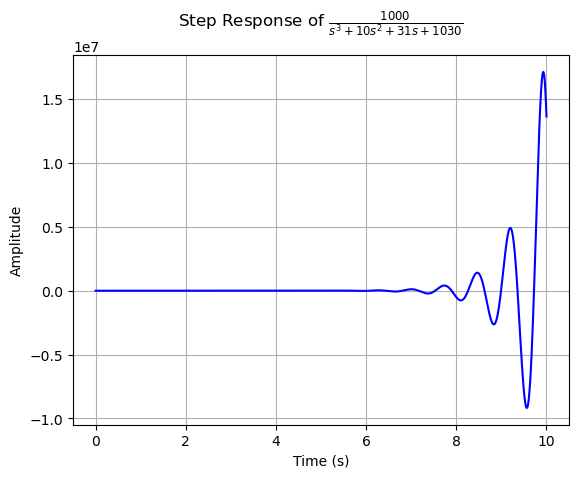

In [6]:
T.plot_unit_step_response()

### Example 6.2 : Stability via Epsilon Method

Determine the stability of the closed-loop transfer function:

In [7]:
T = TransferFunction(10 / (s**5 + 2 * s**4 + 3 * s**3 + 6 * s**2 + 5 * s + 3))
T.expr

10.0/(1.0*s**5 + 2.0*s**4 + 3.0*s**3 + 6.0*s**2 + 5.0*s + 3.0)

In [8]:
print(routh_hurwitz(T.denominator_poly))

          s^5            1            3            5
          s^4            2            6            3
          s^3    1.000e-12          7/2            0
          s^2   -7.000e+12        3.000            0
          s^1        3.500            0            0
          s^0        3.000            0            0



There are two sign changes in the first column of the table, so the system is unstable with two poles in the right half-plane.

In [9]:
T.poles

[(0.3428775611208433+1.5082901611666284j),
 (0.3428775611208433-1.5082901611666284j),
 (-1.6680888389741935+0j),
 (-0.5088331416337468+0.7019951317695378j),
 (-0.5088331416337468-0.7019951317695378j)]

In [10]:
T.is_stable

False

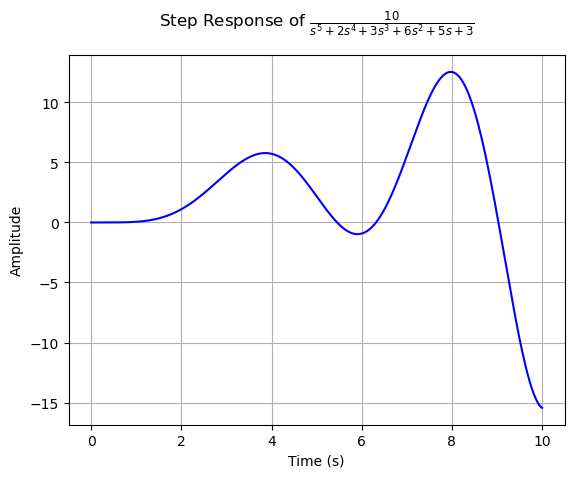

In [11]:
T.plot_unit_step_response()

### Example 6.4 : Stability via Routh Table with Row of Zeros

Determine the number of right-half-plane poles in the closed-loop transfer function:

In [12]:
T = TransferFunction(10 / (s**5 + 7*s**4 + 6*s**3 + 42*s**2 + 8*s + 56))
T.expr

10.0/(1.0*s**5 + 7.0*s**4 + 6.0*s**3 + 42.0*s**2 + 8.0*s + 56.0)

In [13]:
print(routh_hurwitz(T.denominator_poly))

    s^5      1      6      8
    s^4      7     42     56
----------------------------
    s^3     28     84      0
    s^2     21     56      0
    s^1   28/3      0      0
    s^0     56      0      0



All entries in the first column are positive. Hence, there are no right-half-plane poles.

In [14]:
T.poles

[(-7.000000000000027+0j),
 (1.9885241695693383e-16+2.0000000000000044j),
 (1.9885241695693383e-16-2.0000000000000044j),
 (-4.415131921437687e-17+1.414213562373093j),
 (-4.415131921437687e-17-1.414213562373093j)]

In [15]:
T.is_stable

False

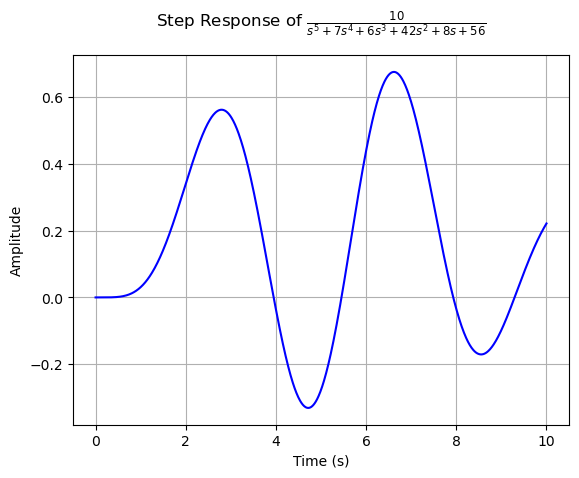

In [16]:
T.plot_unit_step_response()

### Example 6.9 : Stability Design via Routh-Hurwitz

Find the range of gain $K$ for the system that will cause the system to be stable, unstable, and marginally stable. Assume $K > 0$.

In [17]:
G = TransferFunction(K / (s * (s + 7) * (s +11)))
T = G.feedback(TransferFunction(1))
T.expr

K/(K + s**3 + 18*s**2 + 77*s)

In [18]:
print(routh_hurwitz(T.denominator_poly))

         s^3           1          77
         s^2          18           K
         s^1   77 - K/18           0
         s^0           K           0



The first column in row `s^1` can be positive, zero, or negative, depending on the value of $K$. If $K = 1386$, this entry will be zero. If $K < 1386$, all terms in the first column will be positive, and since there are no sign changes, the system will be stable. 